In [2]:
# analyise
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# cleaning
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
# model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
# data analysis

In [3]:
Fake_News=pd.read_csv(r"C:\Users\AFC\Data Science\project\Fake.csv")
Fake_News.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
Fake_News['target']=0
Fake_News.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [5]:
True_News=pd.read_csv(r"C:\Users\AFC\Data Science\project\True.csv")
True_News.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [73]:
True_News["text"][1]

'WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meantime,” the official said, speaking on condition 

In [4]:
Fake_News["text"][1]

'House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys  don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former aide set up meetings with world leaders for Trump, but team Tr

In [6]:
True_News['target']=1
True_News.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
data=pd.concat([Fake_News,True_News], ignore_index=True, sort=False)
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
new_data=data.drop(columns=["date","title","subject"],axis=1)
new_data.head()

,text,target
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [9]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   target  44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [10]:
new_data.shape

(44898, 2)

In [11]:
new_data.isnull().sum()

text      0
target    0
dtype: int64

C:\Users\AFC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Target')

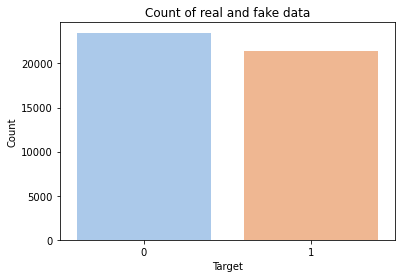

In [12]:
countplot=sns.countplot(data.target,palette="pastel");
countplot.set_title("Count of real and fake data")
countplot.set_ylabel("Count")
countplot.set_xlabel("Target")

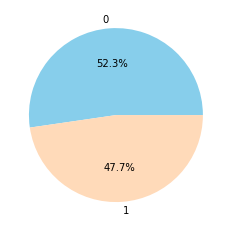

In [13]:
pltpie = plt.pie(data["target"].value_counts().values,explode=[0,0],
             labels=data.target.value_counts().index,
             autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])


In [14]:
text=new_data.text[10]
text

"A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder John Schnatter to step down 

In [15]:
# data cleaning

In [16]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
remove_html(text)

"A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder John Schnatter to step down 

In [17]:
#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)
remove_punctuations(text)

"A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder John Schnatter to step down 

In [21]:
# Removal of Special Characters
def remove_special_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

In [22]:
nltk.download("stopwords")     

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AFC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop_words=set(stopwords.words("english"))
lemma = nltk.WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AFC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\AFC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [24]:

def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in stop_words:
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)
remove_stopwords_and_lemmatization(text)

"centerpiece donald trump campaign , presidency , white supremacist way . many public feud get involve people color . one favorite target , , course , player national football league dare exercise first amendment right kneeling national anthem protest racist police brutality . well , one person figured racism bad business , even get orange overlord elected : founder pizza chain papa john s.this man never right side history number issue , plus pizza suck . , decided complain player protesting , sale really dropped . turn racism pay , know corporation bottom line . therefore , papa john schnatter longer ceo hack pizza chain.breaking : papa john 's founder john schnatter step ceo ; announcement come week criticized nfl protest . ap business news ( @ apbusiness ) december 21 , 2017the thing , people certainly allowed political opinion , realize opinion often come dire consequence especially one business trying garner sale support people , one would presume goal ceo s. one know whether pres

In [25]:
def cleaning(text):
    text=remove_html(text)
    text=remove_punctuations(text)
    text=remove_special_characters(text)
    text=remove_stopwords_and_lemmatization(text)
    return text

In [26]:
cleaning(text)

'centerpiece donald trump campaign presidency white supremacist way many public feud get involve people color one favorite target course player national football league dare exercise first amendment right kneeling national anthem protest racist police brutality well one person figured racism bad business even get orange overlord elected founder pizza chain papa john man never right side history number issue plus pizza suck decided complain player protesting sale really dropped turn racism pay know corporation bottom line therefore papa john schnatter longer ceo hack pizza chain breaking papa john founder john schnatter step ceo announcement come week criticized nfl protest ap business news apbusiness december thing people certainly allowed political opinion realize opinion often come dire consequence especially one business trying garner sale support people one would presume goal ceo one know whether pressure shareholder public outcry boycott even nfl anything stepping right know gone 

In [27]:
new_data["text"]=new_data["text"].apply(cleaning)


C:\Users\AFC\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\AFC\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [28]:
new_data["text"][10]

'centerpiece donald trump campaign presidency white supremacist way many public feud get involve people color one favorite target course player national football league dare exercise first amendment right kneeling national anthem protest racist police brutality well one person figured racism bad business even get orange overlord elected founder pizza chain papa john man never right side history number issue plus pizza suck decided complain player protesting sale really dropped turn racism pay know corporation bottom line therefore papa john schnatter longer ceo hack pizza chain breaking papa john founder john schnatter step ceo announcement come week criticized nfl protest ap business news apbusiness december thing people certainly allowed political opinion realize opinion often come dire consequence especially one business trying garner sale support people one would presume goal ceo one know whether pressure shareholder public outcry boycott even nfl anything stepping right know gone 

In [ ]:
# split data

In [29]:
X=data['text']
y=data['target']

In [30]:
print(new_data.shape)
print(X.shape)
print(y.shape)

(44898, 2)
(44898,)
(44898,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=0)

In [ ]:
# encoding data

In [32]:
#Count vectorizer for bag of words
cv=CountVectorizer()
#transformed train reviews
cv_train_News=cv.fit_transform(X_train)
#transformed test reviews
cv_test_News=cv.transform(X_test)

print('cv_train:',cv_train_News.shape)
print('cv_test:',cv_test_News.shape)

BOW_cv_train: (33673, 108880)
BOW_cv_test: (11225, 108880)


In [33]:
#Tfidf vectorizer
tv=TfidfVectorizer()
#transformed train reviews
tv_train_News=tv.fit_transform(X_train)
#transformed test reviews
tv_test_News=tv.transform(X_test)
print('Tfidf_train:',tv_train_News.shape)
print('Tfidf_test:',tv_test_News.shape)

Tfidf_train: (33673, 108880)
Tfidf_test: (11225, 108880)


In [ ]:
# LogisticRegression

In [34]:
lr =LogisticRegression()
lr_cv=lr.fit(cv_train_News,y_train)
lr_tidif=lr.fit(tv_train_News,y_train)

C:\Users\AFC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
lr_cv_predict=lr_cv.predict(cv_test_News)
print(lr_cv_predict)
lr_tidif_predict=lr_tidif.predict(tv_test_News)
print(lr_tidif_predict)

[1 1 1 ... 1 1 0]
[1 1 1 ... 1 1 0]


In [40]:
print(confusion_matrix(y_test,lr_cv_predict))
print(confusion_matrix(y_test,lr_tidif_predict))

[[4121 1755]
 [   4 5345]]
[[5792   84]
 [  60 5289]]


In [41]:
print(classification_report(y_test,lr_cv_predict))
print(classification_report(y_test,lr_tidif_predict))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82      5876
           1       0.75      1.00      0.86      5349

    accuracy                           0.84     11225
   macro avg       0.88      0.85      0.84     11225
weighted avg       0.88      0.84      0.84     11225

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5876
           1       0.98      0.99      0.99      5349

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [42]:
accuracy_score(y_test,lr_cv_predict)

0.8432962138084632

In [43]:
accuracy_score(y_test,lr_tidif_predict)

0.9871714922048997

In [ ]:
# DecisionTree

In [45]:
dt = DecisionTreeClassifier()
dt_cv=dt.fit(cv_train_News,y_train)
dt_tv=dt.fit(tv_train_News,y_train)

In [46]:
dt_cv_predict=dt_cv.predict(cv_test_News)
print(dt_cv_predict)
dt_tv_predict=dt_tv.predict(tv_test_News)
print(dt_tv_predict)

[1 1 1 ... 1 1 0]
[1 1 1 ... 1 1 0]


In [61]:
#accurcy of train and test data
print(dt_tv.score(tv_train_News,y_train))
print(dt_tv.score(tv_test_News,y_test))

0.9999703026163395
0.9957238307349666


In [62]:
print(confusion_matrix(y_test,dt_cv_predict))
print(confusion_matrix(y_test,dt_tv_predict))

[[5786   90]
 [ 125 5224]]
[[5853   23]
 [  25 5324]]


In [63]:
print(classification_report(y_test,dt_cv_predict))
print(classification_report(y_test,dt_tv_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5876
           1       0.98      0.98      0.98      5349

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5876
           1       1.00      1.00      1.00      5349

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [64]:
print(accuracy_score(y_test,dt_cv_predict))
print(accuracy_score(y_test,dt_tv_predict))

0.9808463251670378
0.9957238307349666


In [69]:
def manual_testing(text):
    testing_text={"text":[text]}
    testing_df=pd.DataFrame(testing_text)
    testing_df["text"]=testing_df["text"].apply(cleaning)
    news=testing_df["text"]
    tv_text=tv.transform(news)
    predict =dt_tv.predict(tv_text)
    return predict
    
    

In [74]:
manual_testing('WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meantime,” the official said, speaking on condition of anonymity. In September, the Pentagon said it had created a panel of senior officials to study how to implement a directive by Trump to prohibit transgender individuals from serving. The Defense Department has until Feb. 21 to submit a plan to Trump. Lawyers representing currently-serving transgender service members and aspiring recruits said they had expected the administration to appeal the rulings to the conservative-majority Supreme Court, but were hoping that would not happen. Pentagon spokeswoman Heather Babb said in a statement: “As mandated by court order, the Department of Defense is prepared to begin accessing transgender applicants for military service Jan. 1. All applicants must meet all accession standards.” Jennifer Levi, a lawyer with gay, lesbian and transgender advocacy group GLAD, called the decision not to appeal “great news.” “I’m hoping it means the government has come to see that there is no way to justify a ban and that it’s not good for the military or our country,” Levi said. Both GLAD and the American Civil Liberties Union represent plaintiffs in the lawsuits filed against the administration. In a move that appealed to his hard-line conservative supporters, Trump announced in July that he would prohibit transgender people from serving in the military, reversing Democratic President Barack Obama’s policy of accepting them. Trump said on Twitter at the time that the military “cannot be burdened with the tremendous medical costs and disruption that transgender in the military would entail.” Four federal judges - in Baltimore, Washington, D.C., Seattle and Riverside, California - have issued rulings blocking Trump’s ban while legal challenges to the Republican president’s policy proceed. The judges said the ban would likely violate the right under the U.S. Constitution to equal protection under the law. The Pentagon on Dec. 8 issued guidelines to recruitment personnel in order to enlist transgender applicants by Jan. 1. The memo outlined medical requirements and specified how the applicants’ sex would be identified and even which undergarments they would wear. The Trump administration previously said in legal papers that the armed forces were not prepared to train thousands of personnel on the medical standards needed to process transgender applicants and might have to accept “some individuals who are not medically fit for service.” The Obama administration had set a deadline of July 1, 2017, to begin accepting transgender recruits. But Trump’s defense secretary, James Mattis, postponed that date to Jan. 1, 2018, which the president’s ban then put off indefinitely. Trump has taken other steps aimed at rolling back transgender rights. In October, his administration said a federal law banning gender-based workplace discrimination does not protect transgender employees, reversing another Obama-era position. In February, Trump rescinded guidance issued by the Obama administration saying that public schools should allow transgender students to use the restroom that corresponds to their gender identity. ')

array([1], dtype=int64)